# **Digital Signal and Image Management - Assignment 4**<br/>
**Master's Degree in Data Science (A.Y. 2021/2022)**<br/>
**University of Milano - Bicocca**<br/>

Nabil  EL Asri


Implement an image classification neural network , following the guidelines shown during the laboratory.

In [1]:
# amount some libraries for the analysis of the data and development of the model
import numpy as np
import matplotlib.pyplot as plt

# DL ops
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# 1. MNIST dataset import and short exploratory analysis

In [2]:
# MNIST dataset import
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
# Check dimensionality
print("X train shape:{}\nX test shape:{}".format(x_train.shape, x_test.shape))

X train shape:(60000, 28, 28)
X test shape:(10000, 28, 28)


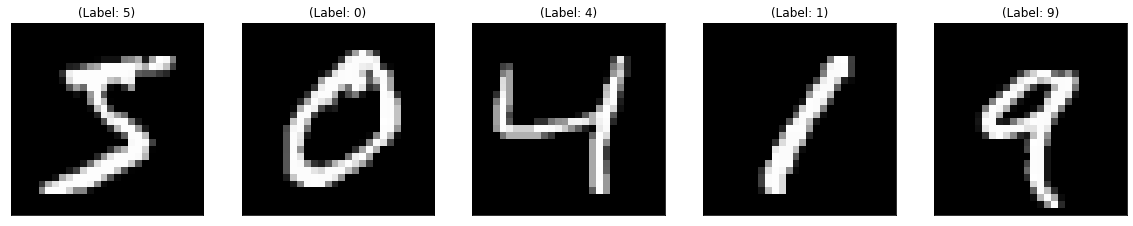

In [4]:
# Examples plot
plt.figure(figsize = (20,15))
n = 5
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.title("(Label: " + str(y_train[i]) + ")")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# 2. Preprocessing (MNIST)

In [5]:
# We add an additional dimension to our images, in the form of np.arrays, to indicate the amount of channels present.
x_train = np.expand_dims(x_train, axis = -1)
x_test = np.expand_dims(x_test, axis = -1)

print("X train shape:{}\nX test shape:{}".format(x_train.shape, x_test.shape))

X train shape:(60000, 28, 28, 1)
X test shape:(10000, 28, 28, 1)


In [6]:
# We convert our images to floating point format and rescale the pixel value from the initial range [0, 255] to the new [0, 1].
print("Original X train max:{}\nOriginal X test max:{}".format(np.max(x_train), np.max(x_test)))

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print("New X train max:{}\nNew X test max:{}".format(np.max(x_train), np.max(x_test)))

Original X train max:255
Original X test max:255
New X train max:1.0
New X test max:1.0


In [7]:
# We need to convert the format of our labels to one-hot encoding to allow multilabel classification.
print("Old y format example: {}".format(y_train[0]))

num_classes = 10
y_train = to_categorical(y_train, num_classes)

print("New y format example: {}".format(y_train[0]))

Old y format example: 5
New y format example: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# 3. Building the network (MNIST)

NEURAL NETWORK:
- 10 epochs
- 1 convolutional layer, with 32 filters, size 3x3
- 1 pooling layer (MaxPooling2D) of size 2x2
- 1 dense layer of 128 neurons
- activation function layers: ReLU
- activation function output layer: Softmax
- optimizer: RMSprop
- batch size: 512
- loss function: categorical_crossentropy

In [8]:
# We start by initializing some hyper-parameters such as batch size, number of epochs and initializing the format of the images 
# that will be input to our network.
batch_size = 512
epochs = 10

input_shape = (28,28,1)

In [9]:
# At this point we define the real body of our model following the delivery specifications.
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     
     layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
     
     layers.MaxPooling2D(pool_size=(2,2)),
     
     layers.Flatten(),
     
     layers.Dense(128, activation='relu'),

     layers.Dense(num_classes, activation='softmax')
     ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

Our model contains ~700'000 parameters, this is due to the large number of neurons in the first fully connected layer. Such a number of neurons in fact leads to the explosion of the total parameters to be estimated as each pixel remaining after the max pooling process will be connected to each neuron.

In [10]:
# We proceed finally to initialize the model and to compile it specifying loss function, optimizer and additional metrics.
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
network_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/10
94/94 [==============================] - 7s 37ms/step - loss: 0.4917 - accuracy: 0.8499 - val_loss: 0.2108 - val_accuracy: 0.9378
Epoch 2/10
94/94 [==============================] - 3s 28ms/step - loss: 0.1799 - accuracy: 0.9470 - val_loss: 0.1305 - val_accuracy: 0.9623
Epoch 3/10
94/94 [==============================] - 3s 32ms/step - loss: 0.1060 - accuracy: 0.9696 - val_loss: 0.0853 - val_accuracy: 0.9758
Epoch 4/10
94/94 [==============================] - 3s 27ms/step - loss: 0.0731 - accuracy: 0.9784 - val_loss: 0.0770 - val_accuracy: 0.9765
Epoch 5/10
94/94 [==============================] - 2s 19ms/step - loss: 0.0557 - accuracy: 0.9837 - val_loss: 0.0633 - val_accuracy: 0.9805
Epoch 6/10
94/94 [==============================] - 2s 18ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0572 - val_accuracy: 0.9834
Epoch 7/10
94/94 [==============================] - 2s 16ms/step - loss: 0.0343 - accuracy: 0.9899 - val_loss: 0.0702 - val_accuracy: 0.9803
Epoch 8/10
94

# 4. Analyze and comment the training results (MNIST)

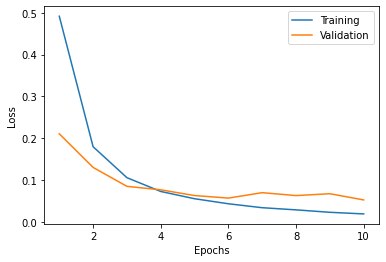

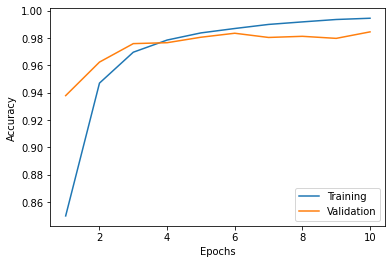

In [11]:
x_plot = list(range(1,epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

There seems to be a slight overfitting but it is not worrying; with different parameters and layers you could make the validation curve closer to the training curve to get a more robust model, but this is not the objective of the assignment.

# 5. Model evaluations and conclusions (MNIST)

In [12]:
# To conclude, we produce a classification report to verify the performance of our model on the test set.
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.9918    0.9888    0.9903       980
           1     0.9956    0.9947    0.9952      1135
           2     0.9661    0.9952    0.9804      1032
           3     0.9833    0.9881    0.9857      1010
           4     0.9918    0.9898    0.9908       982
           5     0.9789    0.9899    0.9844       892
           6     0.9915    0.9791    0.9853       958
           7     0.9863    0.9776    0.9819      1028
           8     0.9926    0.9692    0.9808       974
           9     0.9773    0.9812    0.9792      1009

    accuracy                         0.9855     10000
   macro avg     0.9855    0.9854    0.9854     10000
weighted avg     0.9856    0.9855    0.9855     10000



As you can see the performance is very high, but this is due to the substantial simplicity of the classification, as MNIST is considered a "toy" dataset.

# 6. CIFAR10 dataset import and short exploratory analysis

In [13]:
# CIFAR10 dataset import
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [14]:
# Check dimensionality: note that this time the size is 32x32 with 3 channels (color image)
print("X train shape:{}\nX test shape:{}".format(x_train.shape, x_test.shape))

X train shape:(50000, 32, 32, 3)
X test shape:(10000, 32, 32, 3)


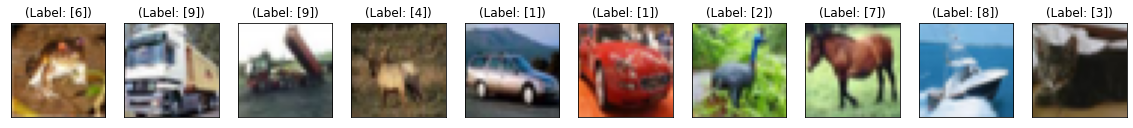

In [15]:
# Examples plot
plt.figure(figsize = (20,15))
n = 10
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.title("(Label: " + str(y_train[i]) + ")")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Thanks to the keras documentation we know the different meanings associated with labels. In particular:
- 0 = airplane
- 1 = automobile
- 2 = bird
- 3 = cat
- 4 = deer
- 5 = dog
- 6 = frog
- 7 = horse
- 8 = ship
- 9 = truck


# 7. Preprocessing (CIFAR10)

In [16]:
# The dedicated 3-channel dimension is already present. So we proceed to convert our images to floating point format 
# and rescale the pixel value from the initial range [0, 255] to the new [0, 1].
print("Original X train max:{}\nOriginal X test max:{}".format(np.max(x_train), np.max(x_test)))

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

print("New X train max:{}\nNew X test max:{}".format(np.max(x_train), np.max(x_test)))

Original X train max:255
Original X test max:255
New X train max:1.0
New X test max:1.0


In [17]:
# We need to convert the format of our labels to one-hot encoding to allow multilabel classification.
print("Old y format example: {}".format(y_train[0]))

num_classes = 10
y_train = to_categorical(y_train, num_classes)

print("New y format example: {}".format(y_train[0]))

Old y format example: [6]
New y format example: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 8. Building the network (CIFAR10)

NEURAL NETWORK:
- 70 epochs
- 1 convolutional layer, with 32 filters, size 3x3
- 1 pooling layer (MaxPooling2D) of size 2x2
- 1 dense layer of 128 neurons
- activation function layers: ReLU
- activation function output layer: Softmax
- optimizer: RMSprop
- batch size: 2048
- loss function: categorical_crossentropy

In [18]:
# We start by initializing some hyper-parameters such as batch size, number of epochs and initializing the format of the images 
# that will be input to our network.
batch_size = 2048
epochs = 70

input_shape = (32,32,3)

In [19]:
# At this point we define the real body of our model following the delivery specifications.
model = keras.Sequential(
    [
     keras.Input(shape=input_shape),
     
     layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
     
     layers.MaxPooling2D(pool_size=(2,2)),
     
     layers.Flatten(),
     
     layers.Dense(128, activation='relu'),

     layers.Dense(num_classes, activation='softmax')
     ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               921728    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 923,914
Trainable params: 923,914
Non-trainable params: 0
________________________________________________

Our model this time contains ~920'000 parameters, as the size of the images is increased (32x32)

In [20]:
# We proceed finally to initialize the model and to compile it specifying loss function, optimizer and additional metrics.
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
network_history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/70
20/20 [==============================] - 3s 97ms/step - loss: 2.3807 - accuracy: 0.1916 - val_loss: 2.0363 - val_accuracy: 0.2779
Epoch 2/70
20/20 [==============================] - 1s 66ms/step - loss: 1.9434 - accuracy: 0.3159 - val_loss: 1.8305 - val_accuracy: 0.3513
Epoch 3/70
20/20 [==============================] - 1s 64ms/step - loss: 1.8260 - accuracy: 0.3589 - val_loss: 1.8340 - val_accuracy: 0.3358
Epoch 4/70
20/20 [==============================] - 1s 65ms/step - loss: 1.7444 - accuracy: 0.3900 - val_loss: 1.7066 - val_accuracy: 0.4100
Epoch 5/70
20/20 [==============================] - 1s 73ms/step - loss: 1.6711 - accuracy: 0.4243 - val_loss: 1.6819 - val_accuracy: 0.4081
Epoch 6/70
20/20 [==============================] - 1s 73ms/step - loss: 1.6225 - accuracy: 0.4386 - val_loss: 1.6751 - val_accuracy: 0.4191
Epoch 7/70
20/20 [==============================] - 1s 66ms/step - loss: 1.5761 - accuracy: 0.4555 - val_loss: 1.5310 - val_accuracy: 0.4719
Epoch 8/70
20

# 9. Analyze and comment the training results (CIFAR10)

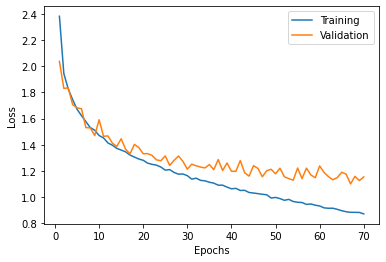

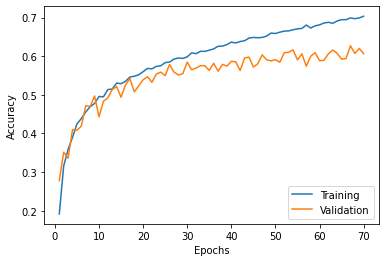

In [21]:
x_plot = list(range(1,epochs+1))
plot_history(network_history)

Overfitting is present more clearly than before. I have tried to adjust the batch size and number of epochs in such a way as to reach a compromise between overfitting and performance.

# 10. Model evaluations and conclusions (CIFAR10)

In [22]:
# To conclude, we produce a classification report to verify the performance of our model on the test set.
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)
print(classification_report(y_test, y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7190    0.6370    0.6755      1000
           1     0.8228    0.6410    0.7206      1000
           2     0.5530    0.3550    0.4324      1000
           3     0.4414    0.4330    0.4372      1000
           4     0.4049    0.7580    0.5279      1000
           5     0.5585    0.4870    0.5203      1000
           6     0.8006    0.5180    0.6290      1000
           7     0.5761    0.7760    0.6613      1000
           8     0.7740    0.7190    0.7455      1000
           9     0.6718    0.7020    0.6866      1000

    accuracy                         0.6026     10000
   macro avg     0.6322    0.6026    0.6036     10000
weighted avg     0.6322    0.6026    0.6036     10000



The performance is fair and has more difficulty in classifying birds, cats and dogs. It is evidence that the dataset is more complex than the previous one and probably needs a network with a better architecture.